In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import cv2

<class 'numpy.ndarray'>


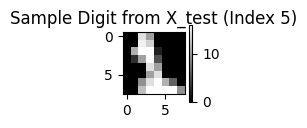

In [8]:
# Load the Digits dataset
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
sample_index = 5
# Get the corresponding image (before scaling)
original_image = X_test[sample_index].reshape(8, 8)
print(type(original_image))
# Save the image
cv2.imwrite("output.png",original_image)
# Plot the image
plt.figure(figsize=(1,1))
plt.imshow(original_image, cmap='gray')
plt.colorbar()
plt.title(f"Sample Digit from X_test (Index {sample_index})")
plt.show()



In [9]:
X_test = scaler.transform(X_test)

sample = X_test[sample_index]
print(type(sample))
print(sample.shape)
sample_img = sample.reshape(8,8)

<class 'numpy.ndarray'>
(64,)


In [10]:
sample = sample.tolist()

In [11]:
import requests

In [12]:
# Prepare the input
data = {
    "instances": [sample]  # The sample data
}


In [13]:
# Send the request
url = "http://10.11.13.2:8000/invocations"
headers = {"Content-Type": "application/json"}
response = requests.post(url, json=data, headers=headers)

# Print the prediction
if response.status_code == 200:
    print("Prediction:", response.json())
else:
    print("Error:", response.status_code, response.text)

Prediction: {'predictions': [1]}
